#Research HW1 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1E-F7ZfIYEG1LBx5DbzCV--RPXk7nBjIX)

## Task

We have a mobile vehicle, which should survive after the track. We have
some predefined trajectory, which is given in y(x) format — our goal to pass this
trajectory as fast as possible. But at the end of the course, there is a drop-off. It
means that we should stop our machine at the end of the trajectory. We have to
establish some constraints, such as max tangent acceleration (max power on the
motor) and normal (road adhesion). Despite it, the best way is to represent our
robot as a particle. How should we move (speed and acceleration) for solving
such a task?


## Given

$a_{t_{max}} = 10\small{m/s^2}\\
a_{n_{max}} = 6\small{m/s^2}\\
v_{max} = 1.5\small{m/s}\\
y(x) = Asin(O_mx + \theta_0),\\
\text{where } A = 1,\ O_m = 3, \theta_0 = 0.2, x \text{ exists on } [0\dots4]
$

## To find

$Y(x),\ Y(t),\ v(t),\ a_t(t),\ a_n(t),\ t$

## Solution

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

In fact at any point on the path we are only limited by $a_t$ and $v$ notice that $a_t ∼ v^2$, while $a_n$ shows how fast we can change $v$.

$a_t = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

From this we can derive 2 constraints for $v$:
$
\begin{cases}
a_t \le 10 \small{m/s^2};\\
v \le 1.5 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 10 \small{m/s^2};\\
v \le 1.5 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
$$

* $y(x) = Asin(O_mx + \theta_0)$
* $\dot y(x) = AOcos(O_mx + \theta_0)$
* $\ddot y(x) = -AO^2sin(O_mx + \theta_0)$

### Let's Plot this values

#### Imports

In [ ]:
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import animation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Plotting

In [ ]:
A = 1
Om = 3
theta0 = 0.2

def y(x):
  return A*np.sin(Om*x + theta0)
def yp(x):
  return A*Om*np.cos(Om*x + theta0)
def ypp(x):
  return -A*Om**2*np.sin(Om*x + theta0)

x0 = 0
x1 = 4
dx = 0.001
X = np.arange(x0, x1, dx)
Y = y(X)
Yp = yp(X)
Ypp = ypp(X)

brk_max = 9.8 #max v decrease
acc_max = 9.8 #max v increase
an_max = 6
v_max = 1.5

R = np.abs((1+Yp**2)**(2/3)/(Ypp))

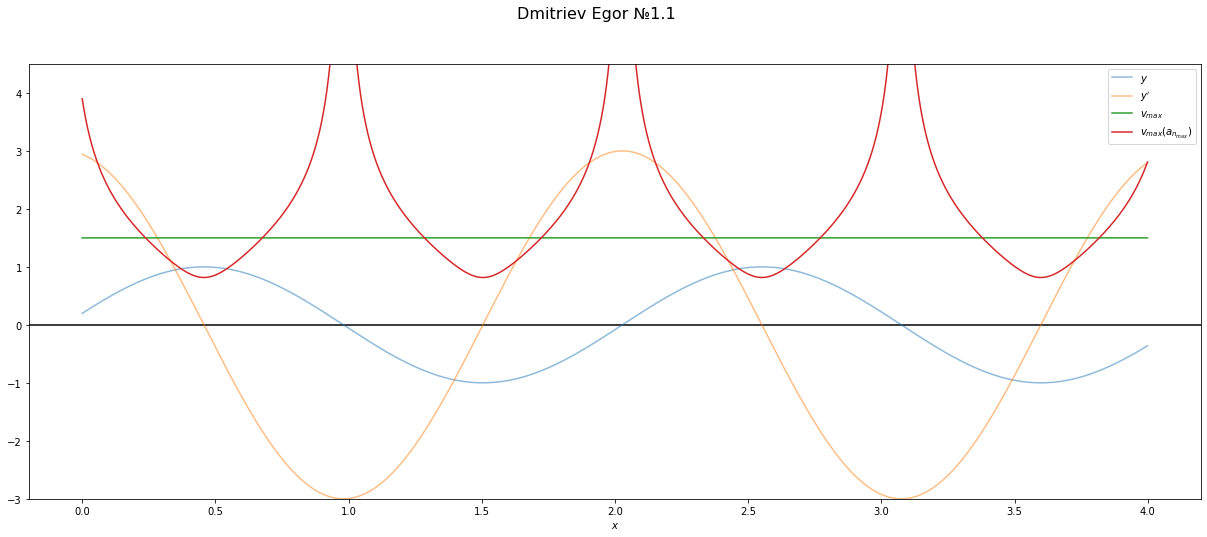

In [ ]:
fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1.1", fontsize=16)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.axhline(y=0, color='k')

ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, Yp, alpha=0.5, label=r'$y^\prime$')
ax1.set_ylim(-3, max(*Yp, v_max)*1.5)
ax1.plot(X, [v_max]*len(X), label=r'$v_{max}$')
ax1.plot(X, np.sqrt(an_max*R), label=r'$v_{max}(a_{n_{max}}$)')
ax1.legend()

#### Plot analysis

As wee can see $a_{n_{max}}$ only limits speed on the turns. Which was expected to happen since tighter turns lead to higher $a_n$, therefore we need to drop the speed to not hit the limit of $a_n$. 

In [ ]:
V = [min(v_max, np.sqrt(an_max*r)) for r in R]

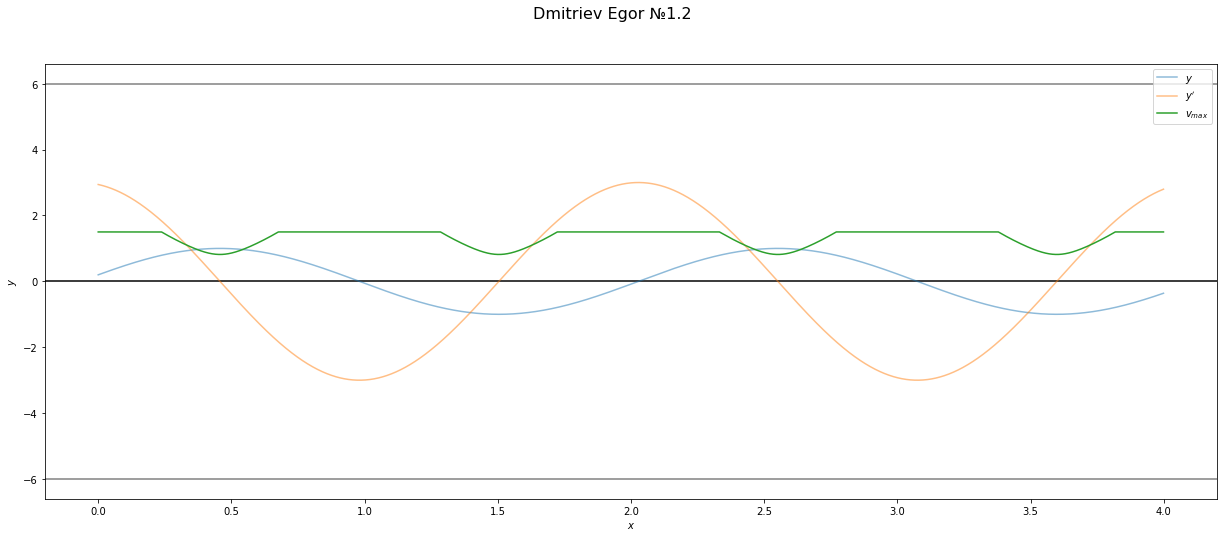

In [ ]:
fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1.2", fontsize=16)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.axhline(y=0, color='k')
ax1.axhline(y=an_max, color='k', alpha=0.5)
ax1.axhline(y=-an_max, color='k', alpha=0.5)

ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, Yp, alpha=0.5, label=r'$y^\prime$')
ax1.plot(X, V, label=r'$v_{max}$')
ax1.legend()

That is the max speed with which we can travel at any point $x$. Now let's take start and finish into account. We chould have $v=0$ at those points. Since further calucations include devision by $v$ let's set $v$ to very small number and not actual zero. 

In [ ]:
V[0] = 1e-5
V[-1] = 1e-5

Now we need to apply limits on $a_t$

$a_t = \frac{dv}{dt} = \frac{dv}{dx}*\frac{dx}{d\sigma}*\frac{d\sigma}{dt} = \frac{dv}{dx}*\frac{dx}{d\sigma}*v$

$\frac{d\sigma}{dx} = \frac{\sqrt{dx^2+dy^2}}{dx} = \sqrt{1+\frac{dy}{dx}^2}$

$a_t = \frac{dv}{dx}*\frac{1}{\sqrt{1+\frac{dy}{dx}^2}}*v$

$dv = a_t\frac{\sqrt{1+\frac{dy}{dx}^2}}{v}dx$

Let's firt plot $a_t$ (purple) with our current velocities

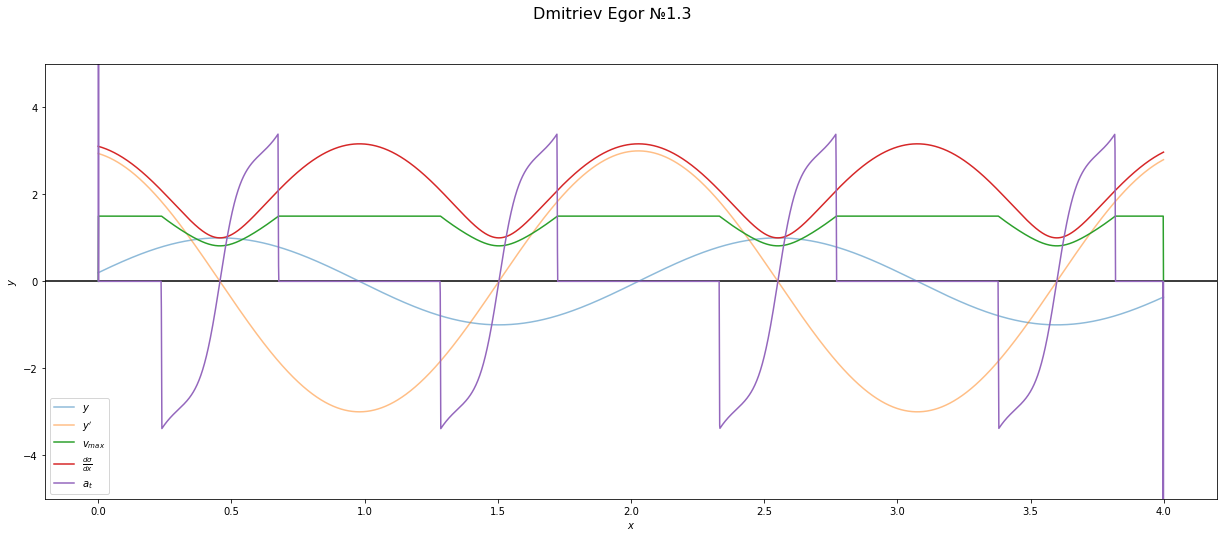

In [ ]:
fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1.3", fontsize=16)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.axhline(y=0, color='k')
ax1.axhline(y=an_max, color='k', alpha=0.5)
ax1.axhline(y=-an_max, color='k', alpha=0.5)
ax1.set_ylim(-5, 5)

ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, Yp, alpha=0.5, label=r'$y^\prime$')
ax1.plot(X, V, label=r'$v_{max}$')
ax1.plot(X, np.sqrt(1+Yp**2), label=r'$\frac{d\sigma}{dx}$')
ax1.plot(X, np.gradient(V, X)*V/np.sqrt(1+Yp**2), label=r'$a_t$')
ax1.legend()

As we can see $a_t$ goes out of berders only at hte start and the finish. To fix that we need to flatten the curve of $v$. SInce we can not increase $v$ we need to reduce $v$ at those points. 

$dv = a_t\frac{\sqrt{1+\frac{dy}{dx}^2}}{v}dx$

$v*v_x^\prime = a_t\sqrt{1+y_x^{\prime\ 2}}$

$v_x^\prime = \frac{a_t}{v}\sqrt{1+y_x^{\prime\ 2}}$

$\frac{dv}{dx} = \frac{a_t}{v}\sqrt{1+y_x^{\prime\ 2}}$

Now we need to go discrete:

$\frac{v_i - v_{(i-1)}}{dx} = \frac{a_t}{v_i}\sqrt{1+y_x^{\prime\ 2}}$

$v_i = v_{(i-1)} + a_t\sqrt{1+y_x^{\prime\ 2}}dx/v_i$

Wrom this we need to find $v_i$. Leave solving it to the solver. 

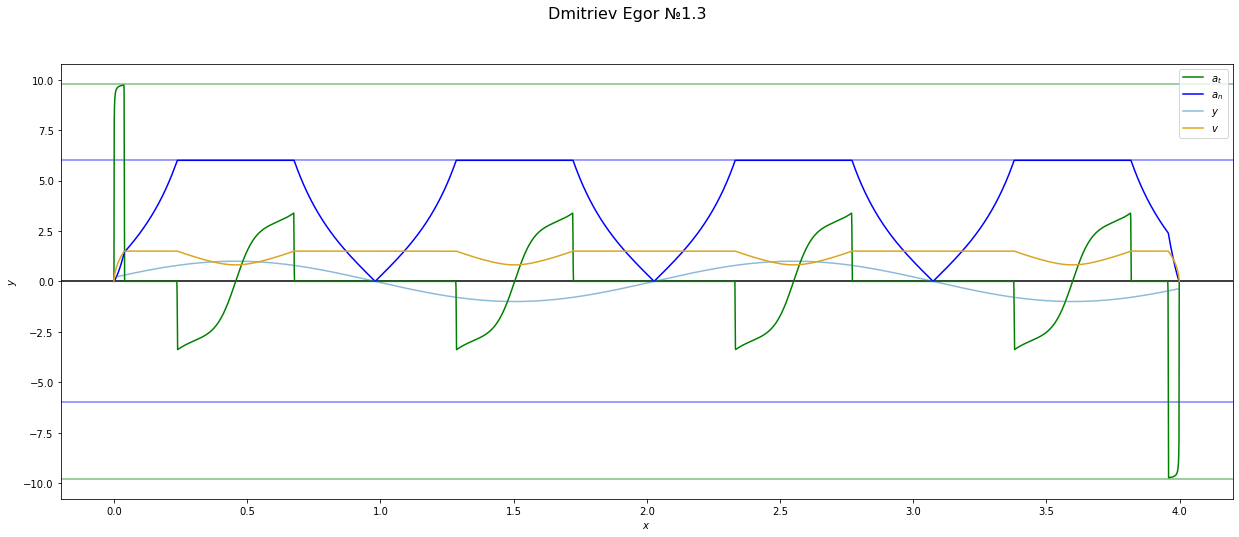

In [ ]:
from sympy.solvers import solve
from sympy import Symbol

k = Symbol('k')

# print("acc_max")
for i in range(1, len(V)):
  kv = solve(V[i-1] + acc_max*np.sqrt(1+yp(X[i])**2)*dx/k - k, k)
  # print(kv)
  if len(kv) != 0 and V[i] > kv[-1]:
    V[i] = kv[-1]
    # print(X[i], ": ", V[i])

# print("brk_max")
for i in range(len(V)-1, 0, -1):
  kv = solve(V[i] + brk_max*np.sqrt(1+yp(X[i-1])**2)*dx/k - k, k)
  # print(kv)
  if len(kv) != 0 and V[i-1] > kv[-1]:
    V[i-1] = kv[-1]
    # print(X[i-1], ": ", V[i-1])


fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1.3", fontsize=16)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.axhline(y=0, color='k')
ax1.axhline(y=acc_max, color='g', alpha=0.5)
ax1.axhline(y=-brk_max, color='g', alpha=0.5)
ax1.axhline(y=an_max, color='b', alpha=0.5)
ax1.axhline(y=-an_max, color='b', alpha=0.5)
# ax1.set_ylim(-10, 10)

ax1.plot(X, np.gradient(V, X)*V/np.sqrt(1+Yp**2), color='g', label=r'$a_t$')
ax1.plot(X, np.power(V,2)/R, color='b', label=r'$a_n$')
ax1.plot(X, Y, alpha=0.5, label=r'$y$')
ax1.plot(X, V, color='goldenrod', label=r'$v$')
ax1.legend()

The final time $t$ is:

$t=\int^4_0\frac{\sigma^{\prime}_x}{v}$

$t=\int^4_0\frac{\sqrt{1+y^{\prime\ 2}}}{v}dx$

In [ ]:
print(np.trapz(np.sqrt(1+np.power(Yp[1:-1],2))/V[1:-1], dx=dx))

6.57716187517286


The final time is $\underline{t = 6.57716187517286}$